In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import lightgbm as lgbm
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [2]:
import graphviz

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from imblearn.under_sampling import RandomUnderSampler

In [60]:
df_data_main = pd.read_csv('recleaned_data_stdscle_v2.csv')
df_data = df_data_main.copy()

In [61]:
df_data

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,decade
0,1.290829,0.343090,-0.586049,-0.946776,0,-0.578414,5,0.929594,-0.152122,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1920
1,1.277648,-1.888467,-0.431375,-0.909987,0,1.401622,8,0.123664,-0.645386,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1920
2,1.298737,-0.835630,-0.620337,-1.299951,0,-0.117816,2,-0.630575,-0.608907,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1920
3,1.293465,-1.110283,-0.554578,-1.049785,0,-0.566669,0,-0.304312,-0.388445,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1920
4,1.027206,-0.732635,-0.434248,-0.681894,1,-0.579976,0,-0.671149,-0.372584,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157099,1.269739,1.355874,-0.097726,-1.685132,0,1.797341,6,-0.812326,-0.987093,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2020
157100,1.280284,1.538976,-0.424418,-1.635099,0,1.939316,7,0.045850,-0.355314,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2020
157101,0.905940,-1.877023,-0.803343,-1.755951,0,2.211184,1,-0.548870,-2.522573,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
157102,1.296101,0.634909,-0.293801,-1.702055,0,2.190039,3,-0.724508,-1.644778,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020


In [62]:
df_data = df_data[df_data.decade != 2020]
labels = df_data['decade']
popularity = df_data['popularity']
df_data = df_data.drop(columns = ['year', 'decade', 'popularity'])

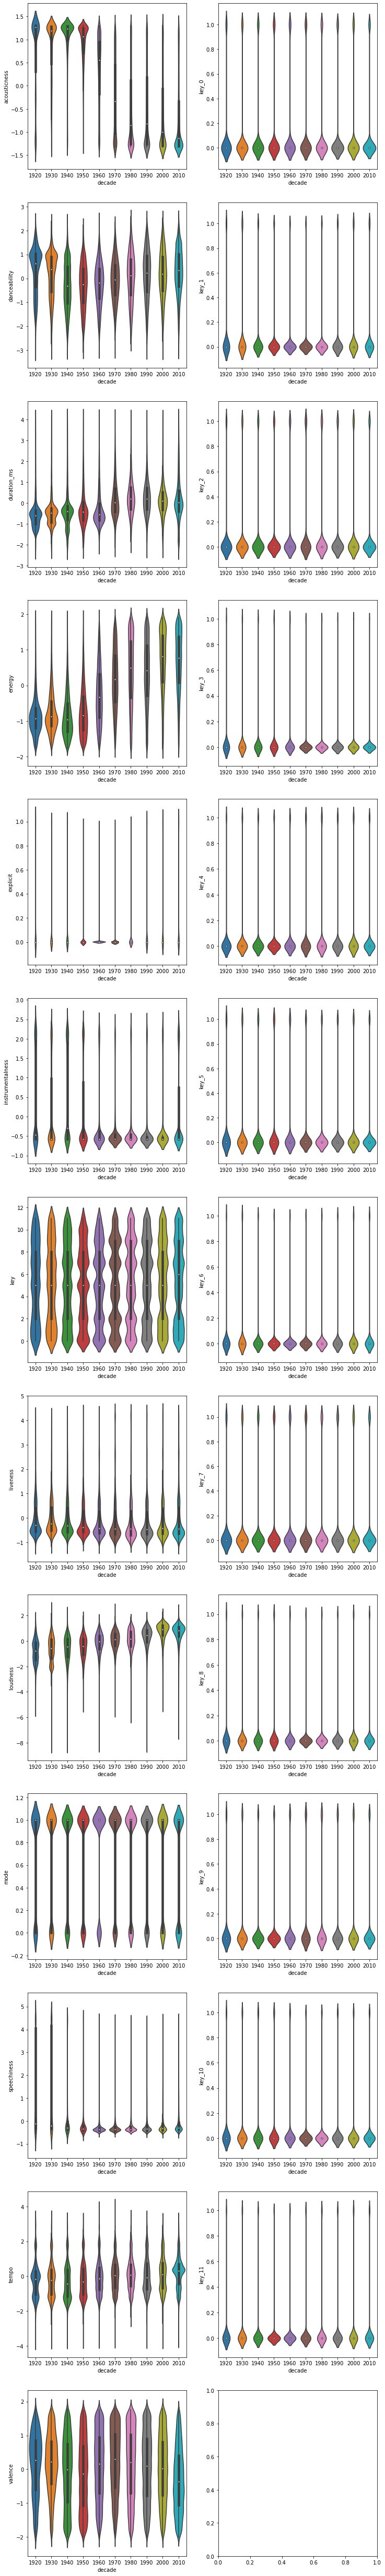

In [9]:
fig, ax = plt.subplots(13,2,figsize=(12,6*15))
for i,col in enumerate(df_data.columns):
    sns.violinplot(data=df_data, x=labels, y=col, ax=ax[i%13][i//13]);

In [10]:
df_data.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'key_0', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11'],
      dtype='object')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_data, labels, test_size=0.20, random_state=2)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((122267, 25), (30567, 25), (122267,), (30567,))

In [13]:
# model_lgbm = lgbm.LGBMClassifier(num_leaves=100, learning_rate=1e-1, num_iteration=100, silent=False)
# model_lgbm.fit(X_train, y_train)
# model_lgbm.score(X_test, y_test)
# y_pred = model_lgbm.predict(X_test)
# print(classification_report(y_test, y_pred))

In [67]:
%%time
#num_iterations
model_lgbm = lgbm.LGBMClassifier()
model_lgbm.fit(X_train, y_train)
print(f'train set score: {model_lgbm.score(X_train, y_train)}')
print(f'test set score: {model_lgbm.score(X_test, y_test)}')
y_pred = model_lgbm.predict(X_test)
print(classification_report(y_test, y_pred))

train set score: 0.5225253778377449
test set score: 0.4214021657342886
              precision    recall  f1-score   support

        1920       0.69      0.49      0.57      1033
        1930       0.60      0.44      0.51      2059
        1940       0.45      0.52      0.48      2763
        1950       0.37      0.51      0.43      3636
        1960       0.40      0.49      0.44      3620
        1970       0.37      0.40      0.38      3633
        1980       0.41      0.42      0.41      3644
        1990       0.37      0.35      0.36      3737
        2000       0.33      0.42      0.37      2502
        2010       0.81      0.27      0.41      3940

    accuracy                           0.42     30567
   macro avg       0.48      0.43      0.44     30567
weighted avg       0.47      0.42      0.42     30567

Wall time: 6.13 s


In [66]:
%%time
#num_iterations
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)
print(f'train set score: {model_xgb.score(X_train, y_train)}')
print(f'test set score: {model_xgb.score(X_test, y_test)}')
y_pred = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\kradk\anaconda3\envs\mldl\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train set score: 0.5887477248236456
test set score: 0.42385579219419633
              precision    recall  f1-score   support

        1920       0.73      0.50      0.59      1033
        1930       0.59      0.47      0.52      2059
        1940       0.45      0.50      0.48      2763
        1950       0.37      0.50      0.43      3636
        1960       0.40      0.50      0.44      3620
        1970       0.37      0.40      0.38      3633
        1980       0.41      0.42      0.41      3644
        1990       0.36      0.35      0.36      3737
        2000       0.33      0.42      0.37      2502
        2010       0.81      0.29      0.43      3940

    accuracy         

In [65]:
## Random Under Sampling

rand_under = RandomUnderSampler(sampling_strategy='majority')

# labels = df_data['decade']
# df_data = df_data.drop(columns = ['year' , 'decade', 'popularity'])
# #df_data = (df_data - df_data.mean()) / (df_data.std())   

X_train, X_test, y_train, y_test = train_test_split(df_data, labels, test_size=0.20)
X_train, y_train = rand_under.fit_resample(X_train, y_train)

model_lgbm = lgbm.LGBMClassifier()
model_lgbm.fit(X_train, y_train)
model_lgbm.score(X_test, y_test)
y_pred = model_lgbm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1920       0.69      0.49      0.57      1033
        1930       0.60      0.44      0.51      2059
        1940       0.45      0.52      0.48      2763
        1950       0.37      0.51      0.43      3636
        1960       0.40      0.49      0.44      3620
        1970       0.37      0.40      0.38      3633
        1980       0.41      0.42      0.41      3644
        1990       0.37      0.35      0.36      3737
        2000       0.33      0.42      0.37      2502
        2010       0.81      0.27      0.41      3940

    accuracy                           0.42     30567
   macro avg       0.48      0.43      0.44     30567
weighted avg       0.47      0.42      0.42     30567



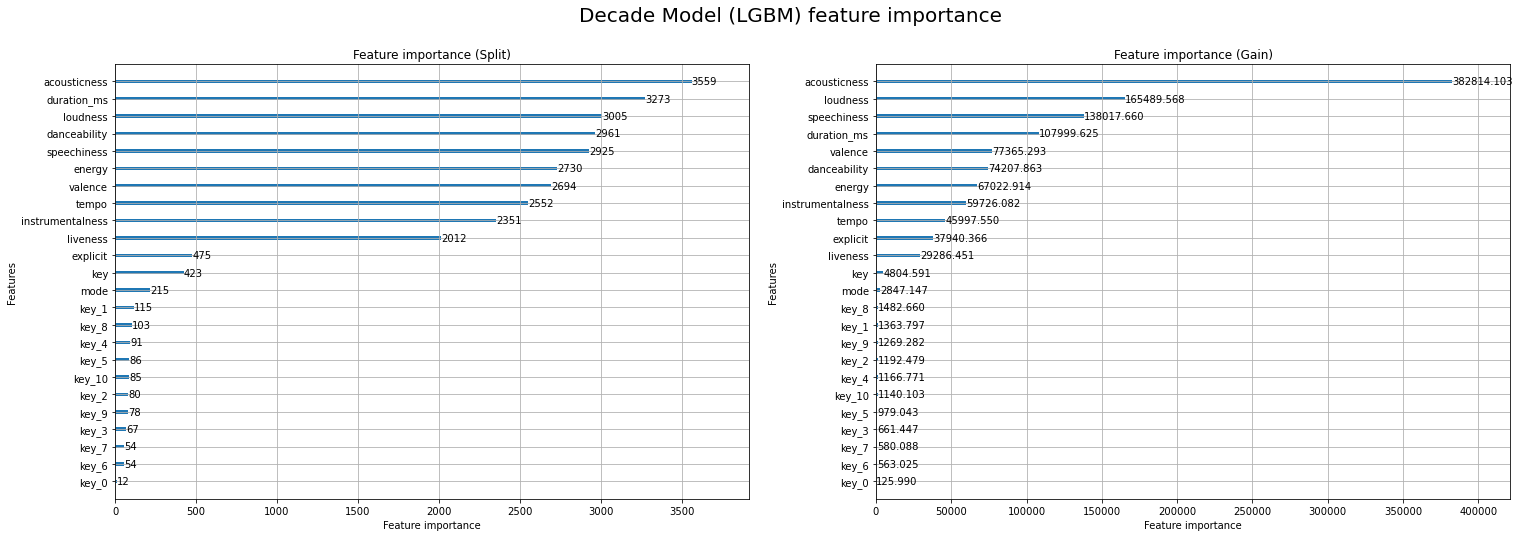

In [16]:
fig, axs = plt.subplots(1,2, figsize=(25,8))
fig.suptitle('Decade Model (LGBM) feature importance', fontsize=20)
# fig, axs = plt)
lgbm.plot_importance(model_lgbm,axs[0], importance_type='split', title='Feature importance (Split)');
lgbm.plot_importance(model_lgbm,axs[1], importance_type='gain', title='Feature importance (Gain)');

In [17]:
X_train

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
55626,0.560594,-0.011670,-1.422462,-0.597279,0,-0.579991,1,0.112548,0.002430,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78427,-1.188277,-0.715469,0.980806,-0.203636,0,-0.579980,4,-0.354336,-0.012020,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111663,0.586957,0.629187,1.360644,0.487998,0,-0.579977,10,-0.610010,0.559665,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
135001,-1.311942,-0.864239,0.195892,1.687322,0,-0.579991,5,-0.755077,1.340182,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4634,-1.261301,0.966782,-0.662117,-0.924702,1,-0.579991,0,0.523850,-1.279633,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33867,1.130019,-0.566698,-0.799347,-1.325703,0,-0.579991,7,-0.653363,-1.730954,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
84434,-0.720611,1.361596,0.273641,0.190007,0,-0.579266,0,3.708664,0.546801,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95816,0.808400,0.600577,0.022827,0.145860,0,1.604013,1,-0.376568,0.083848,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100879,-0.644160,1.481756,-0.559777,0.116429,0,-0.578592,9,-0.797319,0.483535,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model_lgbm = lgbm.LGBMClassifier()
model_xgb = xgb.XGBClassifier()
rfc = RandomForestClassifier(verbose=1)

global models 

models = [model_lgbm, model_xgb, rfc]

def test_model_results(X_train, X_test, y_train, y_test):
    
    result = {}
    
    for model in models:
    
        model.fit(X_train, y_train)
        model.score(X_test, y_test)
        y_pred = model.predict(X_test)
        result[type(model).__name__] = accuracy_score(y_test, y_pred)
    
    return result

In [75]:
results = test_model_results(X_train, X_test, y_train, y_test)

print(results)

C:\Users\kradk\anaconda3\envs\mldl\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:09:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'LGBMClassifier': 0.4214021657342886, 'XGBClassifier': 0.42385579219419633, 'RandomForestClassifier': 0.4185232440213302}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


In [76]:
y_pred = models[2].predict(X_test)
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

        1920       0.79      0.48      0.60      1033
        1930       0.64      0.46      0.53      2059
        1940       0.45      0.53      0.49      2763
        1950       0.37      0.53      0.43      3636
        1960       0.40      0.50      0.44      3620
        1970       0.36      0.41      0.39      3633
        1980       0.40      0.42      0.41      3644
        1990       0.35      0.34      0.34      3737
        2000       0.33      0.40      0.37      2502
        2010       0.87      0.22      0.35      3940

    accuracy                           0.42     30567
   macro avg       0.50      0.43      0.44     30567
weighted avg       0.47      0.42      0.42     30567



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


In [77]:
models[2]

RandomForestClassifier(verbose=1)

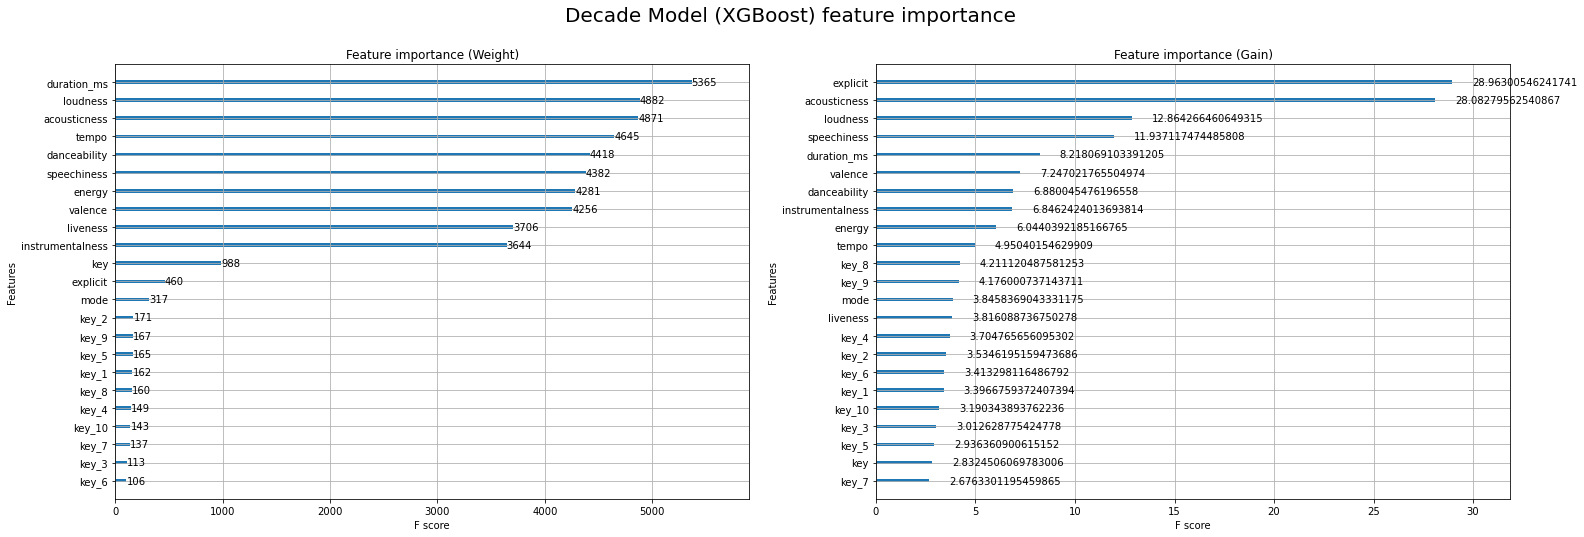

In [20]:
# xgb.plot_importance(models[1])
fig, axs = plt.subplots(1,2, figsize=(25,8))
fig.suptitle('Decade Model (XGBoost) feature importance', fontsize=20)
# fig, axs = plt)
xgb.plot_importance(models[1],axs[0], importance_type='weight', title='Feature importance (Weight)');
xgb.plot_importance(models[1],axs[1], importance_type='gain', title='Feature importance (Gain)');

Text(0.5, 0, 'Relative Importance')

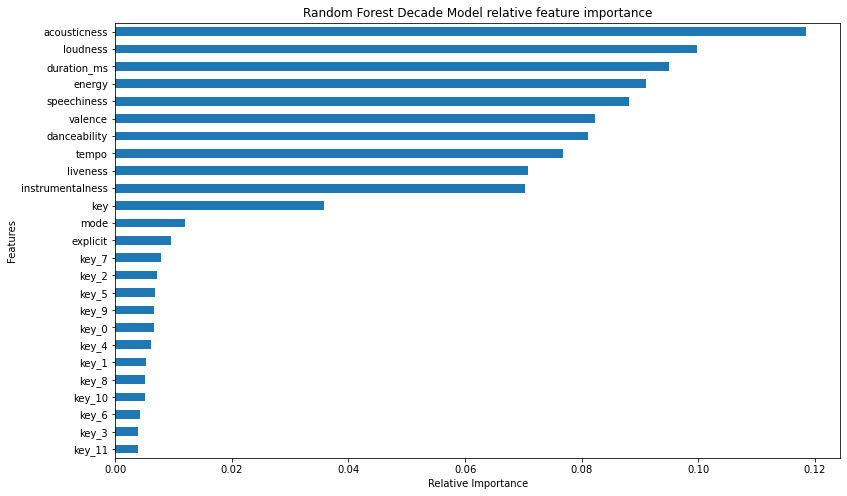

In [21]:
# models[2].feature_importances_
fig, ax= plt.subplots(figsize=(13,8))
feat_importances = pd.Series(models[2].feature_importances_, index=X_test.columns).sort_values(ascending=True)
feat_importances.plot(kind='barh', title='Random Forest Decade Model relative feature importance', ax=ax);

ax.set_ylabel('Features'); ax.set_xlabel('Relative Importance')

In [22]:
df_prediction = X_test.copy()
df_prediction['decade'] = y_test
df_prediction['prediction'] = y_pred

In [23]:
#Extract only the True Positive
#Interested in finding the characteristics of each decade as defined by the true positives (songs which shared similar characteristics and hence cluster close to one other.)
df_prediction.decade.astype(int)
df_prediction.prediction.astype(int)
df_TP = df_prediction[df_prediction['decade'] == df_prediction['prediction']]

In [24]:
popularity.iloc[df_TP.index]

145605    64
21949      0
137072     0
87892     27
119307    52
          ..
11146      0
86830     28
13105      0
43324     25
147908     1
Name: popularity, Length: 13639, dtype: int64

In [25]:
np.zeros?

In [26]:
arr = np.zeros((df_data.shape[0]),dtype=bool)
arr
arr[df_TP.index] = True
arr.sum()
df_data['Test True Positives'] = arr

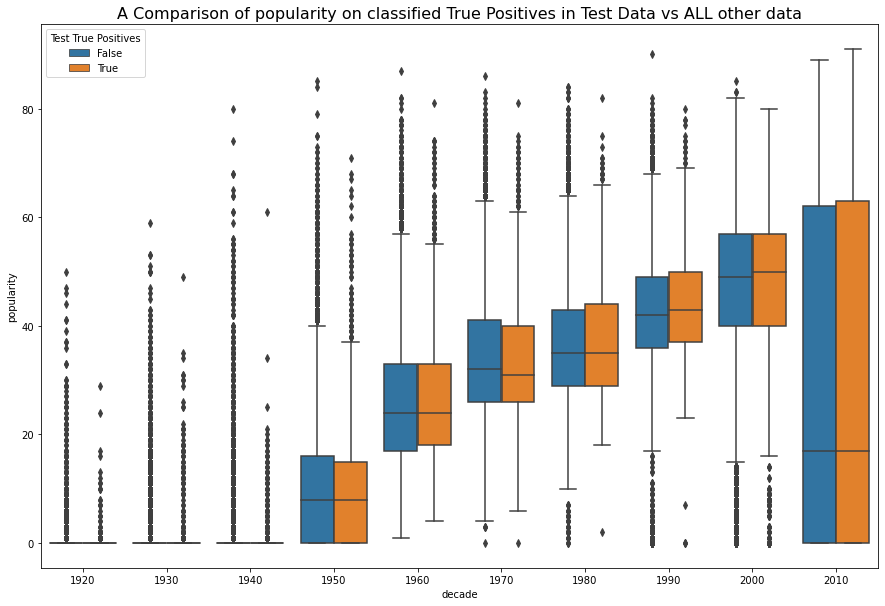

In [27]:
fig, axs = plt.subplots(1,1, figsize=(15,10))
sns.boxplot(x=labels,y=popularity, hue=df_data['Test True Positives'], ax=axs);
# sns.lineplot(x=labels.iloc[df_TP.index],y=popularity.iloc[df_TP.index], ax=axs[1]);

plt.title('A Comparison of popularity on classified True Positives in Test Data vs ALL other data', fontsize=16);

In [28]:
#Get the mean of each features in every decade 
def getFeaturesMean(data):
    decade = data.decade.unique()
    for x , yr in enumerate(decade):
        temp1 = data[data.decade == yr].describe()
        temp1 = temp1.iloc[1].to_frame()
        temp1.rename(columns = {'mean': yr}, inplace = True)
        if x == 0:
            temp = temp1.copy()
        else:
            temp = pd.merge(temp , temp1 , right_index = True , left_index = True)
    
    temp = temp.drop(index = 'decade')
    temp = temp.T.reset_index().rename(columns={'index': 'decade'})
    return temp

df_mean = getFeaturesMean(df_TP)

In [29]:
df_mean.sort_values('decade', inplace=True)

In [30]:
df_mean = df_mean.reset_index(drop=True)

In [31]:
df_data_annoy = df_data.drop(columns='Test True Positives')

In [32]:
labels[0]

1920

In [33]:
df_mean_sim = df_mean.drop(columns=['decade', 'prediction'])

In [34]:
import annoy

In [35]:
original = pd.read_csv('cleaned_data_wo_genres.csv')

In [36]:
f = 25
t = annoy.AnnoyIndex(f, 'dot')
for i in range(df_data_annoy.shape[0]):
    t.add_item(i, df_data_annoy.iloc[i].values)
    
t.build(15)

labels.iloc[t.get_nns_by_item(0, 1000)]

24788     1940
55887     1960
15616     1940
15770     1940
34339     1950
          ... 
46860     1950
115003    1990
58323     1960
28803     1940
136376    2010
Name: decade, Length: 1000, dtype: int64

In [37]:
sim_list = []
for i in range(df_mean.shape[0]):
    print(df_mean.decade[i])
    sim_list.append(labels.iloc[t.get_nns_by_vector(df_mean_sim.iloc[i].values, 
                                                     100)
                               ].value_counts())


1920
1930
1940
1950
1960
1970
1980
1990
2000
2010


In [53]:
t.save('annoy_rec1.ann')

True

In [38]:
decades = df_mean.sort_values('decade').decade

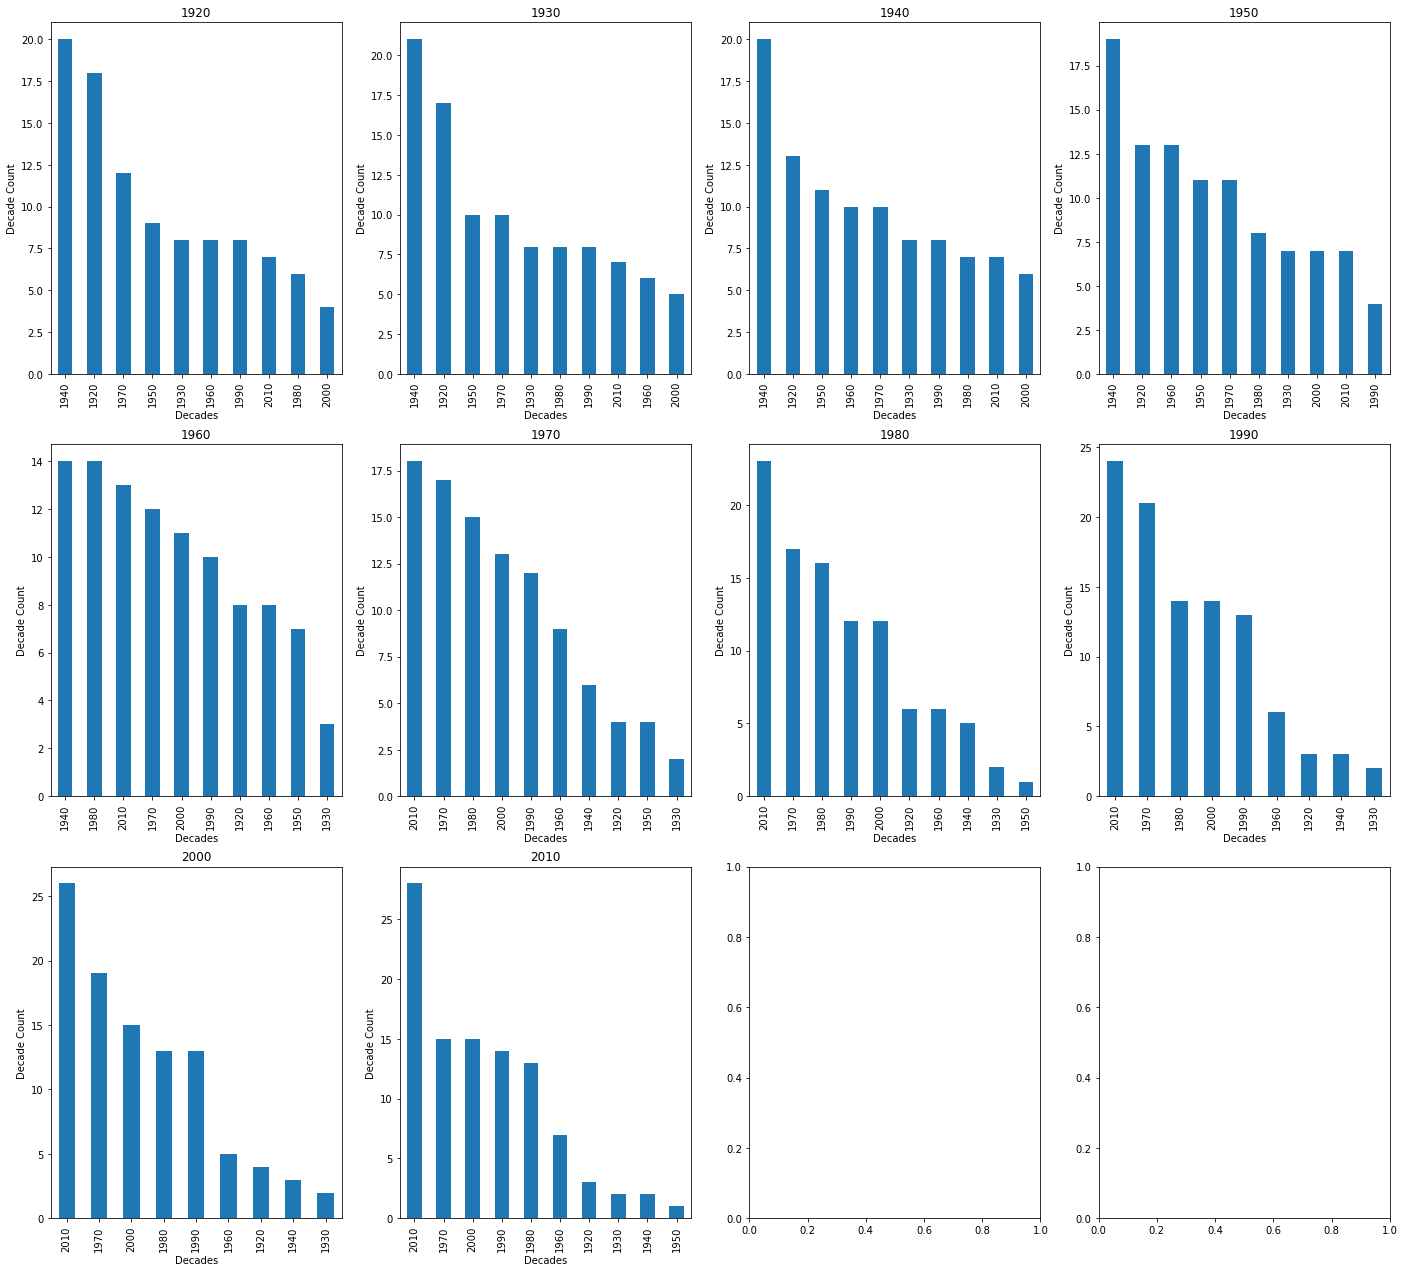

In [155]:
fig, axs = plt.subplots(3,4, figsize=(24,22))

for i in range(len(sim_list)):
    sim_list[i].plot(kind='bar', ax=axs[i//4][i%4])
    axs[i//4][i%4].set_title(f'{df_mean.decade[i]}')
    axs[i//4][i%4].set_xlabel('Decades')
    axs[i//4][i%4].set_ylabel('Decade Count')

# plt.suptitle('Distribution of decades in first 100 nearest neighbors to True Positives from Test Set');
    

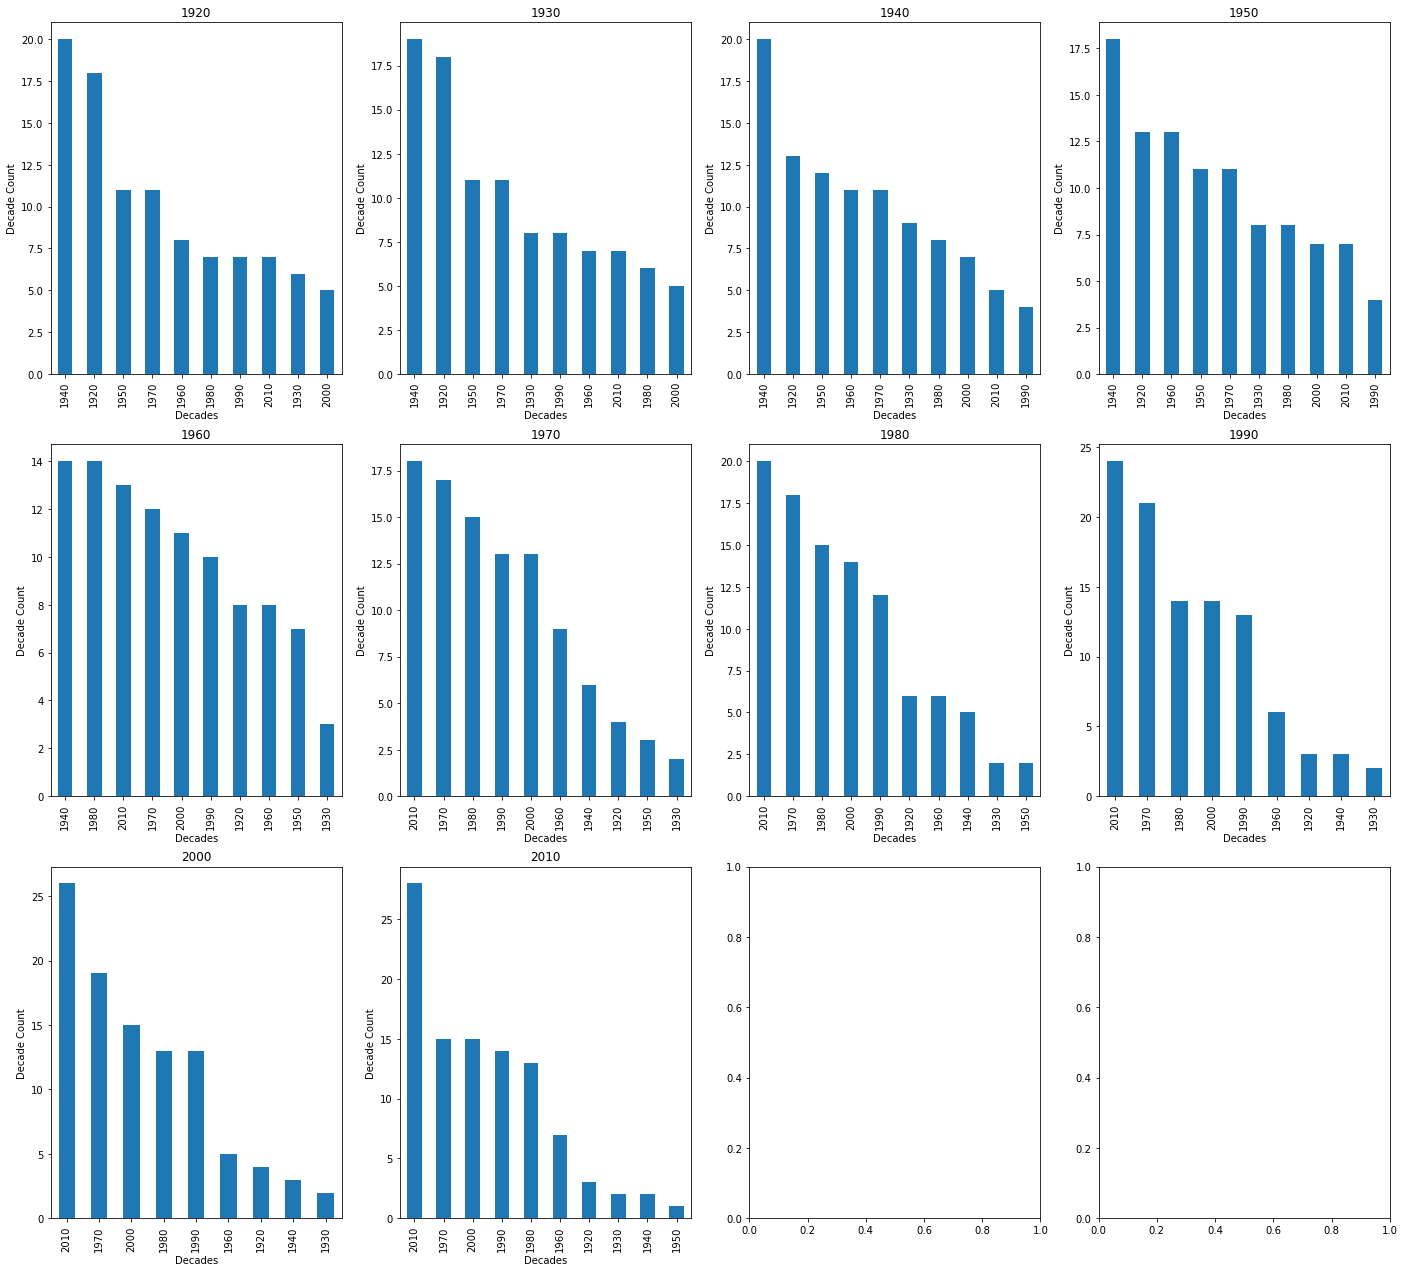

In [43]:
fig, axs = plt.subplots(3,4, figsize=(24,22))

for i in range(len(sim_list)):
    sim_list[i].plot(kind='bar', ax=axs[i//4][i%4])
    axs[i//4][i%4].set_title(f'{df_mean.decade[i]}')
    axs[i//4][i%4].set_xlabel('Decades')
    axs[i//4][i%4].set_ylabel('Decade Count')

# plt.suptitle('Distribution of decades in first 100 nearest neighbors to True Positives from Test Set');
    

In [44]:
df_data_glo = df_data_main.copy()
df_data_glo = df_data_glo[df_data_glo.decade != 2020]
labels = df_data_glo['decade']
# popularity = df_data['popularity']
df_data_glo = df_data_glo.drop(columns = ['year', 'popularity'])

In [45]:
global_centroids = df_data_glo.groupby('decade').mean()

In [46]:
global_centroids

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
decade,,,,,,,,,,,,,,,,,,,,,
1920,0.727534,0.344382,-0.515490,-0.846900,0.139147,0.441763,5.306783,0.012624,-0.819406,0.691085,...,0.080620,0.060853,0.059109,0.106202,0.063566,0.104070,0.074225,0.094767,0.081977,0.064922
1930,0.818388,0.128747,-0.387421,-0.737235,0.059537,0.146745,5.141934,0.064191,-0.637116,0.697346,...,0.086771,0.061127,0.064407,0.096412,0.076831,0.105059,0.061922,0.088162,0.072259,0.065600
1940,0.965137,-0.314233,-0.295111,-0.824422,0.076274,0.490564,5.162350,0.055105,-0.594618,0.702061,...,0.099456,0.063037,0.065469,0.101245,0.053377,0.111835,0.071122,0.079350,0.086005,0.061463
1950,0.884087,-0.317076,-0.222332,-0.711600,0.008430,0.121737,5.060046,-0.004352,-0.519101,0.715762,...,0.094746,0.067606,0.052975,0.131622,0.038072,0.122484,0.084303,0.070815,0.092298,0.037474
1960,0.340244,-0.244236,-0.256316,-0.249741,0.000613,-0.097464,5.095604,-0.025288,-0.153712,0.755418,...,0.111483,0.050755,0.073597,0.118057,0.032871,0.131261,0.062900,0.103850,0.077052,0.041674
1970,-0.249877,-0.068872,0.235916,0.174468,0.003467,-0.229150,5.112940,0.019566,0.047527,0.741263,...,0.145082,0.026529,0.093621,0.084485,0.037316,0.133579,0.037371,0.141670,0.051461,0.059002
1980,-0.511646,0.037648,0.290134,0.396075,0.023576,-0.203449,5.265436,-0.041889,0.070823,0.708538,...,0.124796,0.027442,0.094795,0.079604,0.048895,0.127137,0.046227,0.131983,0.054067,0.074268
1990,-0.488405,0.151554,0.263732,0.361359,0.116896,-0.212385,5.335812,-0.086147,0.285339,0.719537,...,0.108380,0.032498,0.081272,0.081649,0.059229,0.132794,0.056050,0.109620,0.072487,0.069307
2000,-0.611390,0.160768,0.148438,0.656632,0.130230,-0.187744,5.258185,0.006687,0.700478,0.684296,...,0.108620,0.030222,0.081648,0.081810,0.063450,0.117638,0.066943,0.100739,0.063937,0.075798


In [48]:
sim_list_global = []
for i in range(global_centroids.shape[0]):
    print(global_centroids.index[i])
    sim_list_global.append(labels.iloc[t.get_nns_by_vector(global_centroids.iloc[i].values, 
                                                     100)
                               ].value_counts())

1920
1930
1940
1950
1960
1970
1980
1990
2000
2010


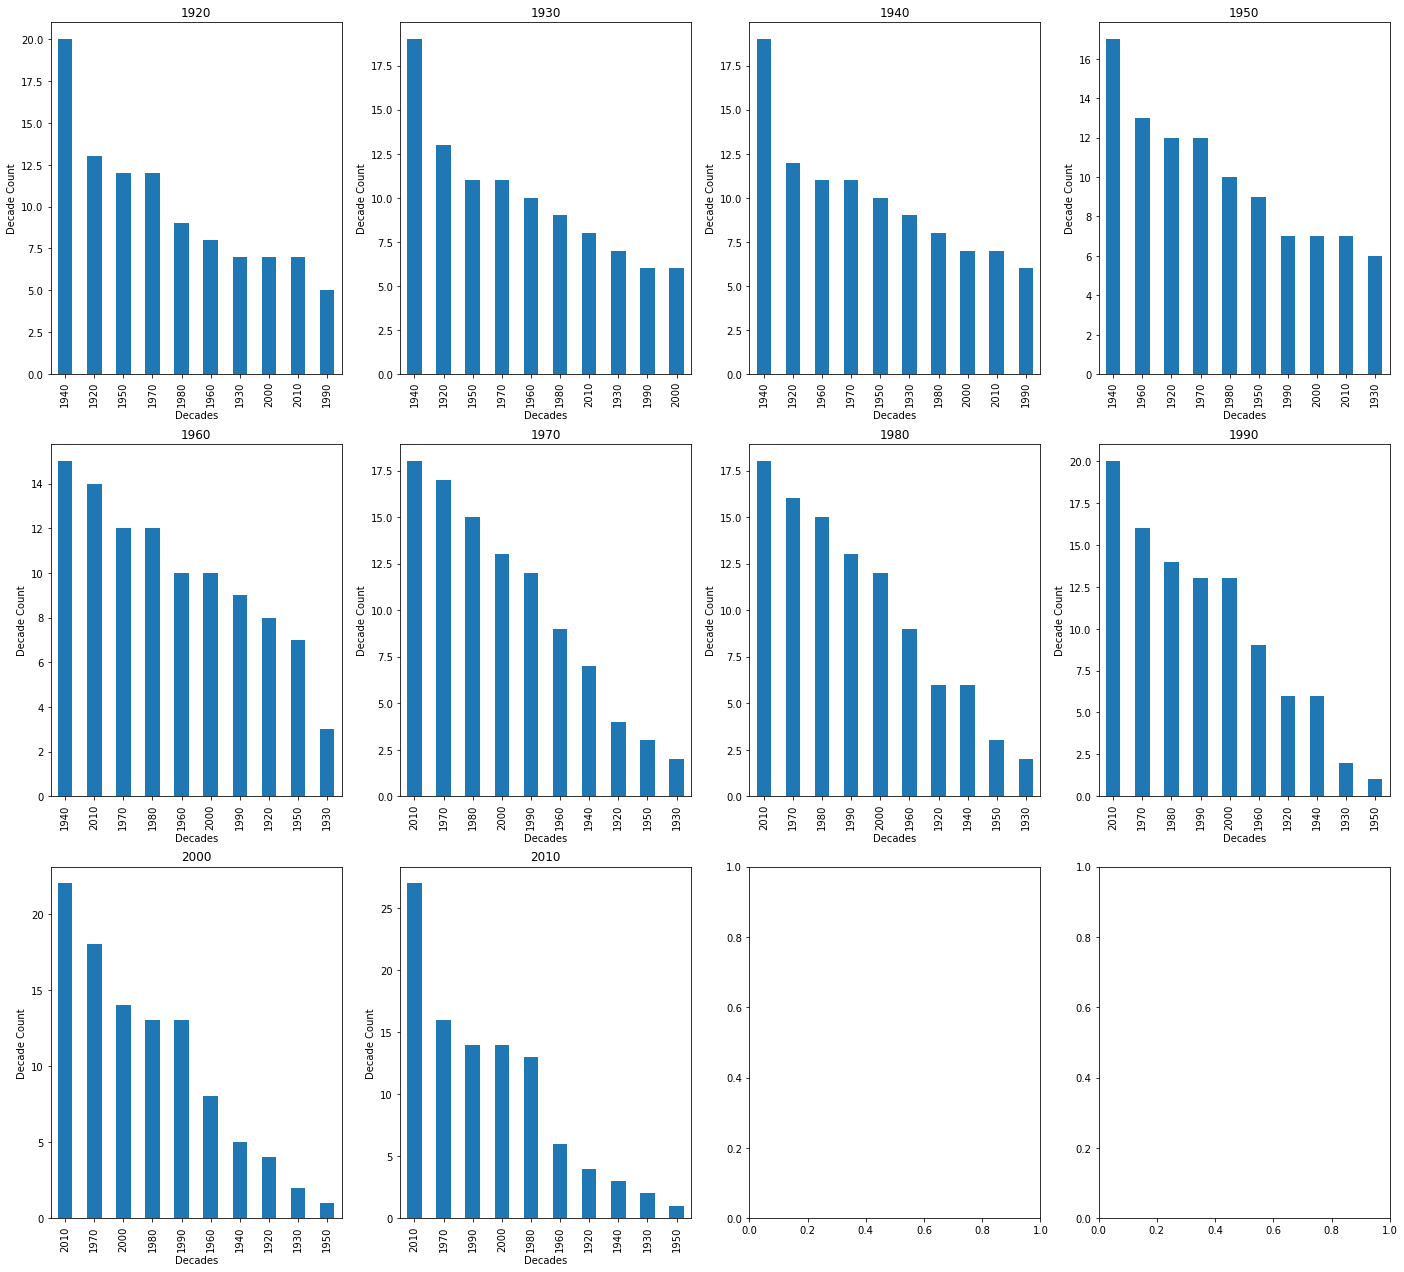

In [52]:
fig, axs = plt.subplots(3,4, figsize=(24,22))

for i in range(len(sim_list_global)):
    sim_list_global[i].plot(kind='bar', ax=axs[i//4][i%4])
    axs[i//4][i%4].set_title(f'{global_centroids.index[i]}')
    axs[i//4][i%4].set_xlabel('Decades')
    axs[i//4][i%4].set_ylabel('Decade Count')

In [54]:
df_mean = pd.melt(df_mean ,id_vars=["decade"], var_name="features", value_name='value').sort_values('decade')
df_mean['decade'] = df_mean['decade'].astype(str)
df_mean = df_mean[(df_mean['features'] != 'prediction') & (df_mean['features'] != 'key')]

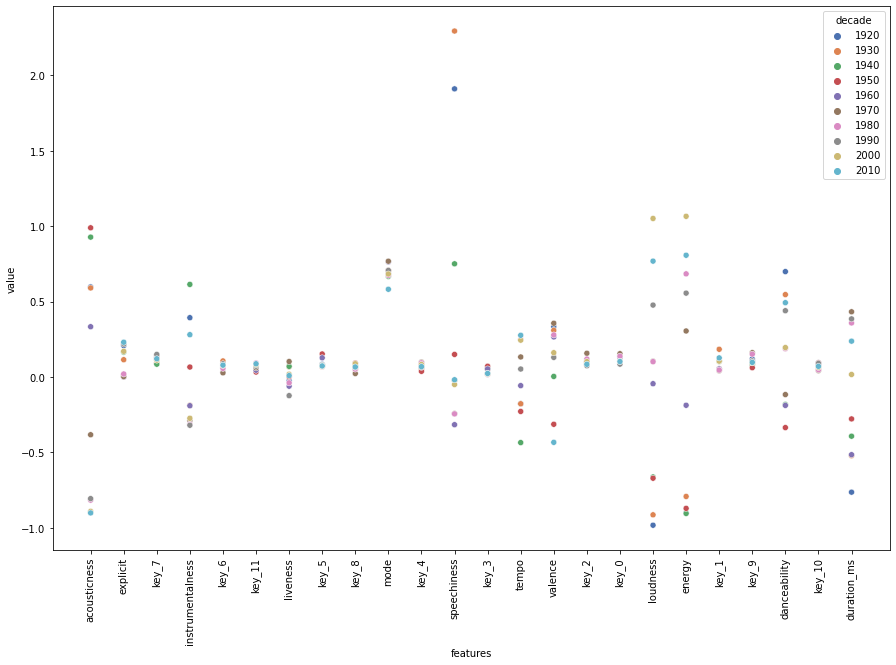

In [55]:
#Show the songs characteristics across each decade

plt.figure(figsize=(15,10))
sns.scatterplot(data=df_mean, x="features", y="value", hue="decade" ,palette="deep")
plt.xticks(rotation=90);

If we are unable to identify the characteristics of songs that define each and every decade, we can consider weakening our goal and instead focus on the difference in the songs between the 1900s and 2000s. <br>

------------------------------Insights that can be shared as data scientist----------------------------------<br>

From the below chart, we can clearly see that songs after 2000s are louder, more energetic, faster in tempo and more rhymthic to dance to.<br>

We can also see that songs after the 2000s generally start to converge to similar characteristics (datapoints are near to each other). Maybe due to globalisation?<br>

Mainstream pop culture replaces the traditional music and commercialized the pop music which leads to decrease in the diversification of music.

In [56]:
df_mean

,decade,features,value
0,1920,acousticness,0.597379
40,1920,explicit,0.208185
200,1920,key_7,0.090747
50,1920,instrumentalness,0.393315
190,1920,key_6,0.060498
...,...,...,...
179,2010,key_4,0.068668
189,2010,key_5,0.073191
199,2010,key_6,0.078536
209,2010,key_7,0.120888


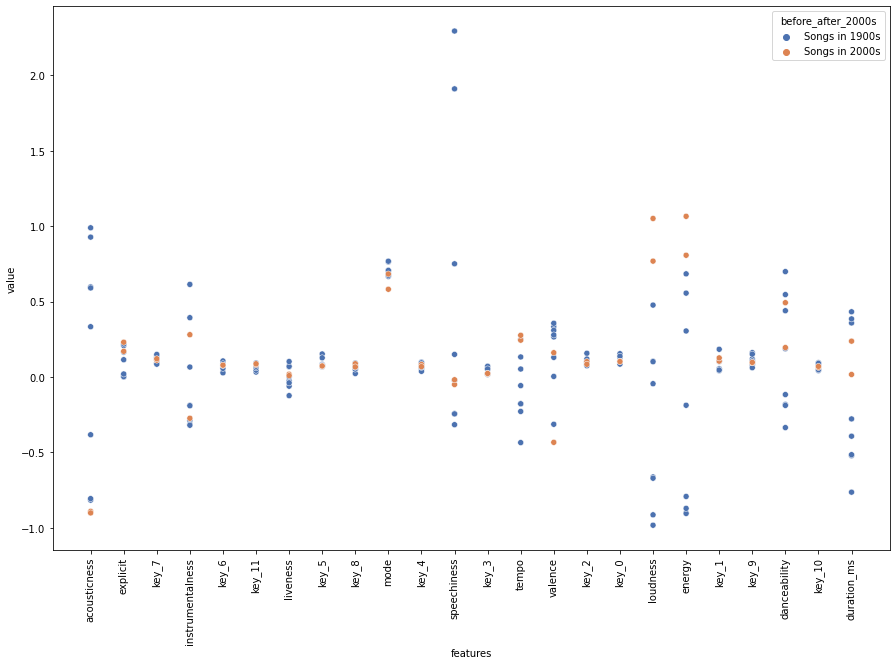

In [57]:
df_mean['decade'] = df_mean['decade'].astype(int)
df_mean['before_after_2000s']= np.where(df_mean['decade'] >= 2000 , 'Songs in 2000s' , 'Songs in 1900s')
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_mean, x="features", y="value", hue="before_after_2000s" ,palette="deep")
plt.xticks(rotation=90);

If there is indeed a trend whereby songs after 2000s are increasingly similar to each other (and also/hence distinctively different from the 1900s), classifying the songs solely between these 2 eras should give good result 

In [58]:
df_data = df_data_main.copy()
#df_data = df_data.drop(columns = ['artists' , 'id' , 'name' , 'genres', 'release_date'])
df_data['decade'] = np.where(df_data['year'] < 2000  , 1900 , 2000)

rand_under = RandomUnderSampler(sampling_strategy='majority')

labels = df_data['decade']
df_data = df_data.drop(columns = ['year' , 'decade', 'popularity'])
#df_data = (df_data - df_data.mean()) / (df_data.std())   

X_train, X_test, y_train, y_test = train_test_split(df_data, labels, test_size=0.20)
X_train, y_train = rand_under.fit_resample(X_train, y_train)

model_lgbm = lgbm.LGBMClassifier()
model_lgbm.fit(X_train, y_train)
model_lgbm.score(X_test, y_test)
y_pred = model_lgbm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1900       0.93      0.83      0.88     24085
        2000       0.59      0.80      0.68      7336

    accuracy                           0.82     31421
   macro avg       0.76      0.81      0.78     31421
weighted avg       0.85      0.82      0.83     31421



In [59]:
df_data = df_data_main.copy()
#df_data = df_data.drop(columns = ['artists' , 'id' , 'name' , 'genres', 'release_date'])
df_data['decade'] = np.where(df_data['year'] < 2000  , 1900 , 2000)

rand_under = RandomUnderSampler(sampling_strategy='majority')

labels = df_data['decade']
df_data = df_data.drop(columns = ['year' , 'decade', 'popularity'])
#df_data = (df_data - df_data.mean()) / (df_data.std())   

X_train, X_test, y_train, y_test = train_test_split(df_data, labels, test_size=0.20)
X_train, y_train = rand_under.fit_resample(X_train, y_train)

model_lgbm = lgbm.LGBMClassifier(seed=2)
model_lgbm.fit(X_train, y_train)
model_lgbm.score(X_test, y_test)
y_pred = model_lgbm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1900       0.93      0.83      0.88     24082
        2000       0.58      0.81      0.68      7339

    accuracy                           0.82     31421
   macro avg       0.76      0.82      0.78     31421
weighted avg       0.85      0.82      0.83     31421



In [ ]:
X_train.shape

In [ ]:
lgbm.plot_importance??

In [ ]:
lgbm.LGBMClassifier??

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(25,8))
# fig, axs = plt)
fig.suptitle('Era Model feature importance', fontsize=20)
lgbm.plot_importance(model_lgbm,axs[0], importance_type='split', title='Feature importance (Split)');
lgbm.plot_importance(model_lgbm,axs[1], importance_type='gain', title='Feature importance (Gain)');

In [ ]:
##NEW
fig, axs = plt.subplots(1,2, figsize=(25,8))
# fig, axs = plt)
fig.suptitle('Era Model feature importance', fontsize=20)
lgbm.plot_importance(model_lgbm,axs[0], importance_type='split', title='Feature importance (Split)');
lgbm.plot_importance(model_lgbm,axs[1], importance_type='gain', title='Feature importance (Gain)');

In [ ]:
fig, ax = plt.subplots(13,2,figsize=(12,6*15))
for i,col in enumerate(df_data.columns):
    sns.violinplot(data=df_data, x=labels, y=col, ax=ax[i%13][i//13]);

The accuracy obtained is high. Thus, it supports our hypothesis that there is indeed a clear difference between the 1900s and 2000s songs. <br>

How we can present our findings/share a story: (just a proposal for our discussion) <br>
1) We set out to classify songs into their respective decade in hope of finding the characteristics of song that defined each decade <br>
2) Found out that the classification result is not that high <br>
3) Extract the true positive cluster and did an analysis on it <br>
4) realised that songs after 2000s tend to share similar characteristics. Suspect that songs are becoming more similar <br>
5) tried to classify songs between these 2 eras. Got a high accuracy result. <br>
6) share possible reasons on why there is a loss in the diversification of music. <br>
7) can also share maybe our initial model did not perform as well on decade prediction due to the diversification of music in ealier decades. This make it difficult for the model to classify accurately as there is no distinctive music features that dominated a particular decade. 